## This is a notebook that use Linear Regression to predict the Cummulative Grade Point


#Import modules


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Loading the dataset

In [2]:
#Load the data
#Load the data
df = pd.read_excel (r'C:\Users\Dell\Downloads\Y3S1.xlsx', sheet_name='Sheet1')


In [3]:
#Display the first 7 row of data
df.head(7)

,Gender,State,MPU34012,UCCD2502,UCCD2513,UCCN1213,Semester3_GPA,Semester3_CGPA,Semester1_CGPA
0,Female,Pahang,67,74,64,59,2.7000,2.869841,2.920988
1,Male,Kedah,67,53,60,68,2.6375,2.926984,2.895062
2,Male,Malacca,65,61,65,72,3.0375,3.009524,2.992593
3,Female,Kelantan,69,67,65,74,3.1125,2.903175,2.935802
4,Male,Perak,77,75,64,50,2.5875,2.853968,2.893827
5,Male,Johor,64,58,81,53,2.7125,2.723810,2.637037
6,Female,Negeri Sembilan,63,73,70,65,3.1875,2.869841,2.946914


In [4]:
#Count the number of rows and columns in the data set
df.shape

(10000, 9)

In [5]:
#Find the column that consist null value
df.isna().sum()

Gender            0
State             0
MPU34012          0
UCCD2502          0
UCCD2513          0
UCCN1213          0
Semester3_GPA     0
Semester3_CGPA    7
Semester1_CGPA    7
dtype: int64

In [6]:
#Remove the row that consist of null value
df1=df.dropna()

In [7]:
#Check the if there still any null value
df1.isna().sum()

Gender            0
State             0
MPU34012          0
UCCD2502          0
UCCD2513          0
UCCN1213          0
Semester3_GPA     0
Semester3_CGPA    0
Semester1_CGPA    0
dtype: int64

In [8]:
df1.describe()

,MPU34012,UCCD2502,UCCD2513,UCCN1213,Semester3_GPA,Semester3_CGPA,Semester1_CGPA
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,68.084059,66.147003,65.969679,66.037927,2.896104,2.880231,2.872690
std,8.668405,8.411998,8.457967,8.441200,0.311542,0.119555,0.107267
min,43.000000,41.000000,43.000000,43.000000,2.000000,2.361905,2.359259
25%,62.000000,60.000000,60.000000,60.000000,2.700000,2.800000,2.802469
50%,68.000000,66.000000,66.000000,66.000000,2.925000,2.882540,2.875309
75%,74.000000,72.000000,72.000000,72.000000,3.112500,2.963492,2.946914
max,94.000000,89.000000,89.000000,90.000000,3.700000,3.301587,3.233333


In [9]:
df1.dtypes

Gender             object
State              object
MPU34012            int64
UCCD2502            int64
UCCD2513            int64
UCCN1213            int64
Semester3_GPA     float64
Semester3_CGPA    float64
Semester1_CGPA    float64
dtype: object

#Exploratory Data Analysis

[Text(0.5, 1.0, 'Year 3 Semester 1 CGPA')]

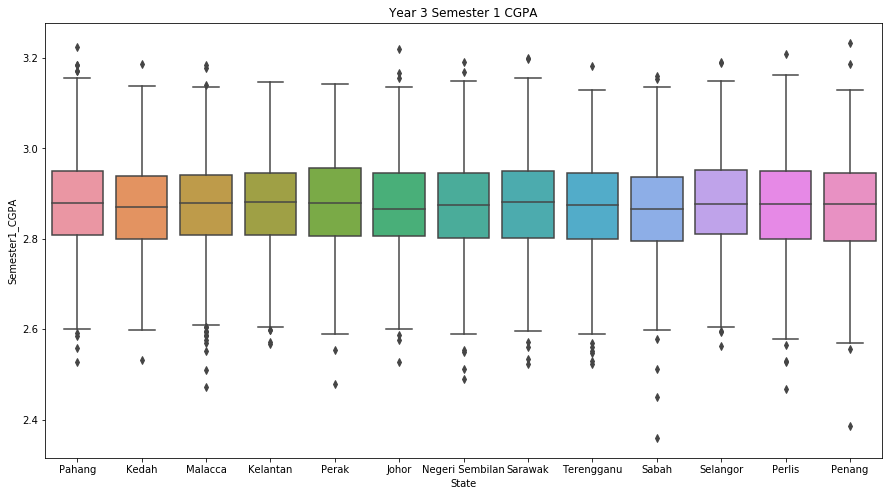

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(x='State', y='Semester1_CGPA',data=df1).set(title='Year 3 Semester 1 CGPA')

In [11]:
gen =df1[df1['Semester1_CGPA'].between(2.8,3.3)]

In [12]:
#Get a count of the number of each state
gen['State'].value_counts()

Johor              619
Malacca            614
Negeri Sembilan    608
Kelantan           598
Terengganu         597
Perlis             595
Selangor           595
Sarawak            576
Pahang             569
Perak              562
Kedah              561
Sabah              558
Penang             518
Name: State, dtype: int64

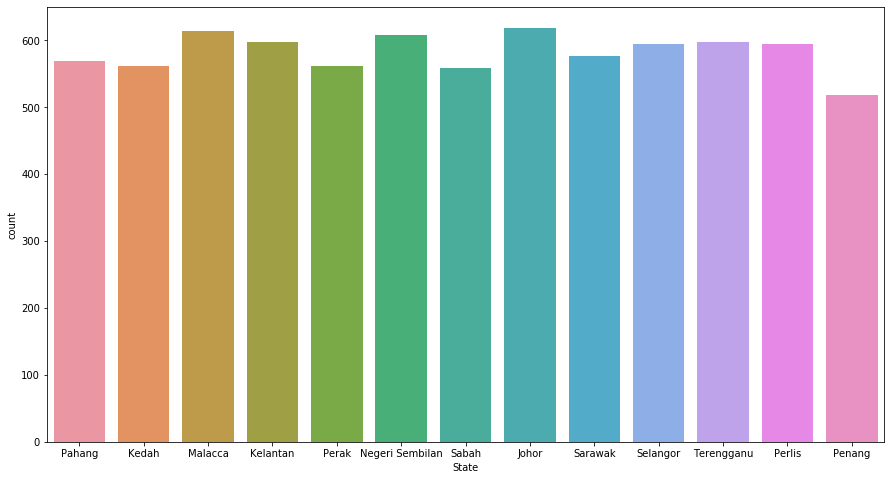

In [13]:
#Visualize the count of Grade
plt.figure(figsize=(15,8))
sns.countplot(gen['State'], label='count')

In [14]:
#Get a count of the number of each Gender
gen['Gender'].value_counts()


Female    3797
Male      3773
Name: Gender, dtype: int64

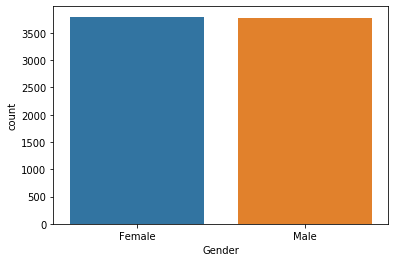

In [15]:
#Visualize the count of Gender
sns.countplot(gen['Gender'], label='count')

#Drop the column that does not related

In [16]:
df1.drop(['Gender','State'], axis='columns', inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df1.shape

(9993, 7)

In [18]:
#Print the data after dropping the columns
df1.head()

,MPU34012,UCCD2502,UCCD2513,UCCN1213,Semester3_GPA,Semester3_CGPA,Semester1_CGPA
0,67,74,64,59,2.7000,2.869841,2.920988
1,67,53,60,68,2.6375,2.926984,2.895062
2,65,61,65,72,3.0375,3.009524,2.992593
3,69,67,65,74,3.1125,2.903175,2.935802
4,77,75,64,50,2.5875,2.853968,2.893827


#Splitting the data

In [19]:
#Split the data set into independent(X) and dependent(Y) data sets
y = df1.iloc[:,-1:]
X = df1.iloc[:,:-1]

In [20]:
#Split the data set into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#Feature Scaling

In [21]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Model Training

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Accuracy:" ,model.score(X_test, y_test)*100)

Accuracy: 73.1197590571004


In [24]:
prediction = model.predict(X_test)
print(prediction)
print(y_test)

[[2.9463207 ]
 [2.91562766]
 [2.93830245]
 ...
 [2.99786756]
 [2.68447667]
 [2.96037715]]
      Semester1_CGPA
6517        2.995062
7387        2.859259
545         2.981481
505         3.015584
3248        2.906173
...              ...
3727        2.800000
6612        2.848148
1449        3.016049
2749        2.739506
1351        2.990123

[2998 rows x 1 columns]


In [26]:
import pickle 
pickle_out = open("Y3S1.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()